# Amostragem de sinais analógicos

Nenhum sinal digital tem componentes com frequências acima de fs/2. 

Se o sinal analógico a ser digitalizado tiver componentes acima de fs/2, estas devem ser eliminadas antes da amostragem.

Se isto não for feito, ocorre o efeito de aliasing, que consiste na transposição dos sinais de alta frequência para a região compreendida entre 0 e fs/2, causando distorção do sinal.

<img src="aliasing1.jpg" width="600" style="float: left;">

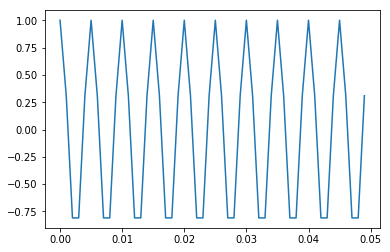

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

fs=1000 # frequência de amostragem
f = 200 # frequência do sinal
duration = 2.0 # seconds

# Gerando sinal
t=np.arange(0,duration,1.0/fs)
x=np.cos(2*np.pi*f*t);

# Mostrando o sinal
plt.plot(t[:50],x[:50])
plt.show()

# Salvando sinal como arquivo wav
wavfile.write("seno.wav",fs,x)

### Exercícios: 

a) Qual a máxima frequência que pode ser reproduzida com esta fs? Faça o teste e responda.

b) Mantenha fs a 1000 Hz, e faça f=700. O que acontece? Por que? Como fazer para ouvir o tom de 700 Hz corretamente? 

## Aliasing 

Um chirp é uma função cossenoidal que muda de frequência com o tempo. Veja um exemplo abaixo:

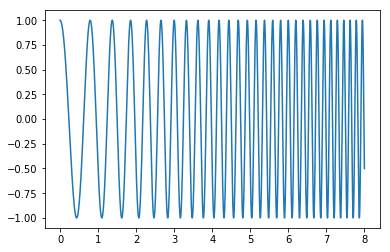

In [10]:
from scipy.signal import chirp

t = np.linspace(0, 8, 5001)
w = chirp(t, 1, 6, 5, 'linear')
plt.plot(t, w)
plt.show()

Vamos agora ouvir como é este sinal. No código abaixo, f0 é a frequência inicial, e f1 a frequência final.

In [11]:
import scipy.signal as sig

fs = 1000 # frequência de amostragem
f0=100 # frequência inicial
f1=500 # frequência final
t=np.arange(0,1/fs,3)
x=sig.chirp(t,f0,3,f1,"linear",0);

# Salvando sinal como arquivo wav
wavfile.write("chirp.wav",fs,x)

### Exercício

Mude f1 para 1000 Hz e veja o que acontece. Por que isto ocorreu?

## Aliasing na vida real com sinal de áudio

Vamos inicialmente carregar um sinal de áudio

In [12]:
from scipy.signal import butter, freqs, sosfilt
from scipy.io import wavfile

# Carregando o sinal
fs, x = wavfile.read('ana.WAV')

# Normalizando o sinal para o intervalo [-1,1]
x = x/32000

Agora vamos ver o que acontece se abaixamos a frequência de amostragem.

Vamos supor que queremos abaixar a frequência de amostragem pela metade. Antes de fazer isso, devemos remover o conteúdo que pode sofrer aliasing, como mostrado na figura abaixo:

<img src="remove_espectro.png">

In [15]:
fator = 2 # se fator = 2, fs será diminuída pela metade. Se for 3, será diminuída por 3.

fc = fs/4 # freq de corte em Hz

sos = butter(10, 2*fc/fs, 'lp', output='sos')
y = sosfilt(sos, x)

wavfile.write("anaf.wav",fs,y)
# Removendo a parte do sinal que não interessa
b, a = signal.butter(50, 1/fator, 'low', analog=True)

#[b,a]=butter(50,1/fator);

w = signal.lfilter(b, a, x)

#w=filter(b,a,x);

w1=zeros(1,floor(length(x)/fator));
j=0;
i=0;
while (j < x.size): 
    w1[i]=w[j]
    j=j+fator
    i=i+1

# Salvando o sinal
wavfile.write("audio.wav",int(fs/fator),w1)


NameError: name 'signal' is not defined

Veja que o som ficou mais abafado.

Agora, se não removermos a parte do espectro que vai ficar acima de fs/2, esta vai sofrer aliasing, e interferir na parte do sinal que está abaixo de fs/2. Ouça o áudio e veja o que acontece:

In [23]:
z=zeros(1,floor(length(x)/fator));
j=1;
i=1;
while j < length(x) 
   z(i)=x(j);
   j=j+fator;
   i=i+1;
end

player = audioplayer(z,fs/fator,16)
play(player)

player =

audioplayer object with properties:

  BitsPerSample =  16
  CurrentSample = 0
  DeviceID = -1
  NumberOfChannels =  1
  Running = off
  SampleRate =  5512
  TotalSamples =  12721
  Tag = 
  Type = audioplayer
  UserData = [](0x0)



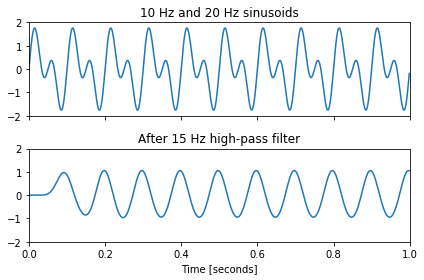

In [64]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = butter(10, 2*15/1000, 'lp', output='sos')
filtered = sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()